In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

## **PROBLEM 1**

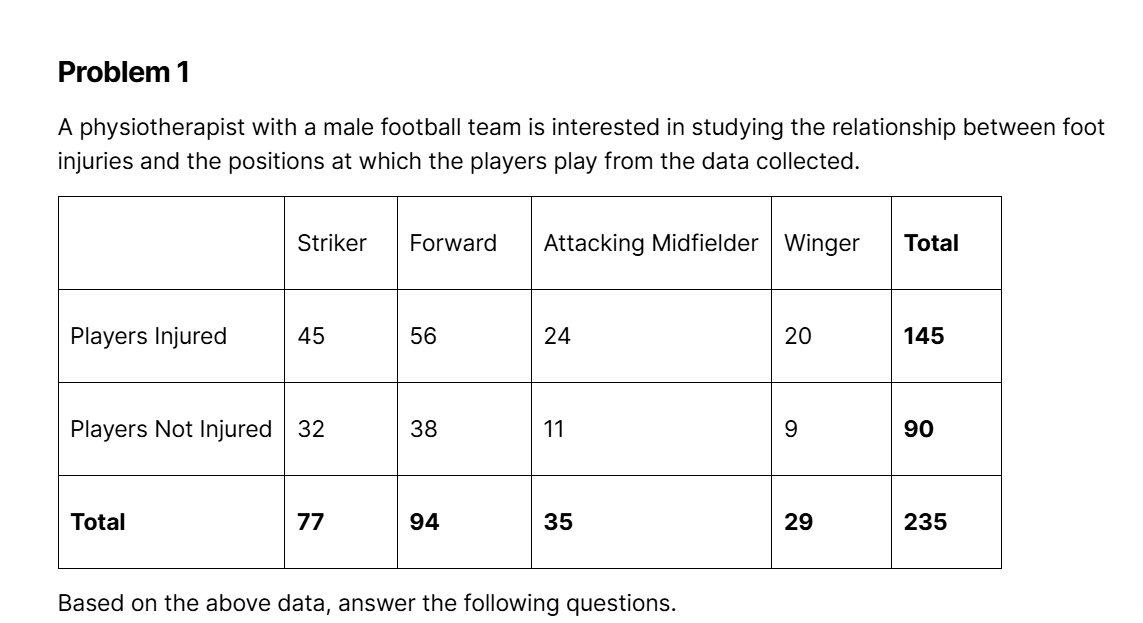

### **1.1 What is the probability that a randomly chosen player would suffer an injury?**

In [2]:
players_injured = 145
total_players = 235
probability = players_injured/total_players
print(probability)

0.6170212765957447


### **1.2 What is the probability that a player is a forward or a winger?**

In [3]:
total_forward = 94
total_winger = 29
probability1  = (total_forward/total_players) + (total_winger/total_players)
print(probability1)

0.5234042553191489


### **1.3 What is the probability that a randomly chosen player plays in a striker position and has a foot injury?**

In [4]:
injured_strikers = 45
total_strikers = 77
probability2 = (total_strikers/total_players) * (injured_strikers/total_strikers)
print(probability2)

0.19148936170212763


### **1.4 What is the probability that a randomly chosen injured player is a striker?**

In [5]:
total_injured_players = 145
probability3 = injured_strikers/total_injured_players
print(probability3)

0.3103448275862069


## **Problem 2**

The breaking strength of gunny bags used for packaging cement is normally distributed with a mean of 5 kg per sq. centimeter and a standard deviation of 1.5 kg per sq. centimeter. The quality team of the cement company wants to know the following about the packaging material to better understand wastage or pilferage within the supply chain; Answer the questions below based on the given information; (Provide an appropriate visual representation of your answers, without which marks will be deducted)

### **2.1 What proportion of the gunny bags have a breaking strength of less than 3.17 kg per sq cm?**

In [6]:
from scipy.stats import norm
mu = 5
sigma = 1.5
strength_lessthan = norm.cdf(3.17,mu,sigma)
print(strength_lessthan)

0.11123243744783456


### **2.2 What proportion of the gunny bags have a breaking strength of atleast 3.6 kg per sq cm?**

In [7]:
mu = 5
sigma = 1.5
strength_atleast = 1 - norm.cdf(3.6,mu,sigma)
print(strength_atleast)

0.8246760551477705


### **2.3 What proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm?**

In [8]:
breaking_strength = norm.cdf(5.5,mu,sigma) - norm.cdf(5,mu,sigma)
print(breaking_strength)

0.13055865981823633


### **2.4 What proportion of the gunny bags have a breaking strength not between 3 and 7.5 kg per sq cm?**

In [9]:
breaking_strengthnot = 1 - (norm.cdf(7.5,mu,sigma) - norm.cdf(3,mu,sigma))
print(breaking_strengthnot)

0.13900157199868257


**Visual Representations for 4 sub questions**

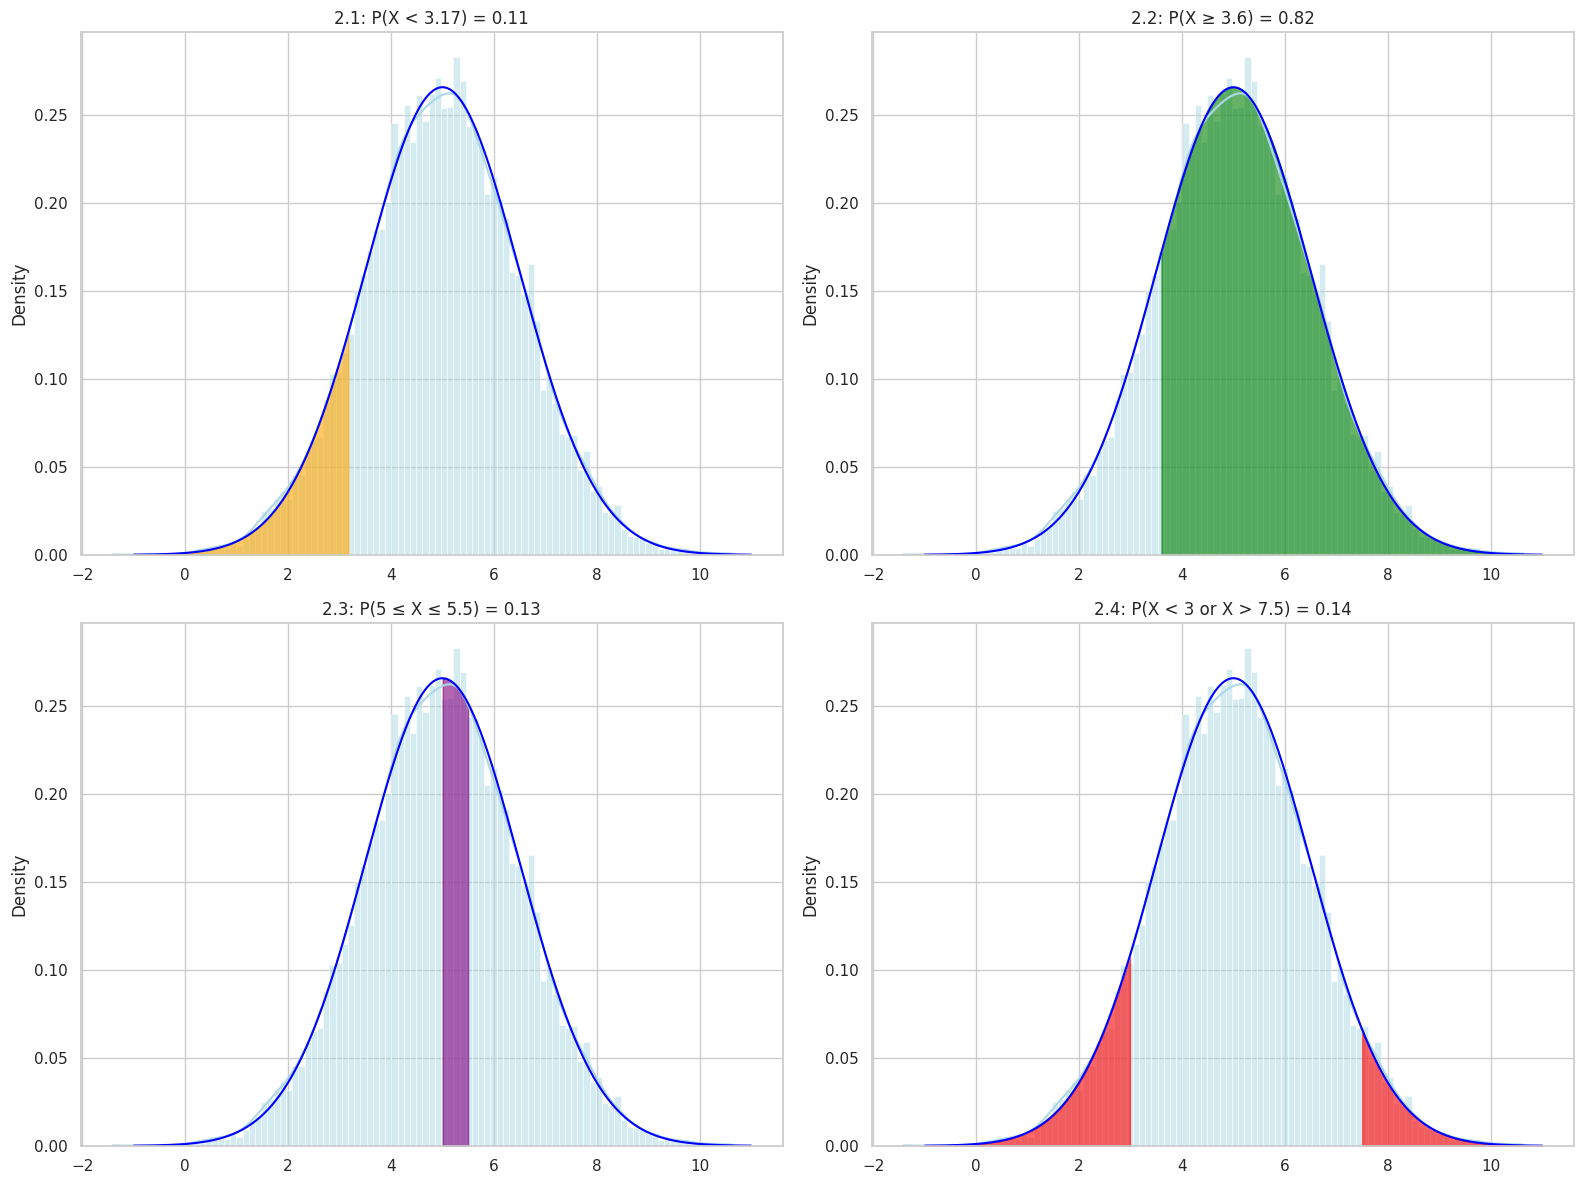

In [10]:
mean = 5
std = 1.5
n = 10000
z = np.random.randn(n)
breaking_strengths = np.sort(mean + std * z)

# Set up grid for plotting
x_vals = np.linspace(mean - 4*std, mean + 4*std, 1000)
pdf_vals = norm.pdf(x_vals, mean, std)
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 2.1: < 3.17
prop_2_1 = norm.cdf(3.17, mean, std)
ax = axes[0, 0]
sns.histplot(breaking_strengths, bins=100, kde=True, stat='density', color='lightblue', edgecolor='white', ax=ax)
ax.plot(x_vals, pdf_vals, color='blue')
x_fill = x_vals[x_vals < 3.17]
ax.fill_between(x_fill, norm.pdf(x_fill, mean, std), color='orange', alpha=0.6)
ax.set_title(f"2.1: P(X < 3.17) = {prop_2_1:.2f}")

# 2.2: ≥ 3.6
prop_2_2 = 1 - norm.cdf(3.6, mean, std)
ax = axes[0, 1]
sns.histplot(breaking_strengths, bins=100, kde=True, stat='density', color='lightblue', edgecolor='white', ax=ax)
ax.plot(x_vals, pdf_vals, color='blue')
x_fill = x_vals[x_vals >= 3.6]
ax.fill_between(x_fill, norm.pdf(x_fill, mean, std), color='green', alpha=0.6)
ax.set_title(f"2.2: P(X ≥ 3.6) = {prop_2_2:.2f}")

# 2.3: Between 5 and 5.5
prop_2_3 = norm.cdf(5.5, mean, std) - norm.cdf(5, mean, std)
ax = axes[1, 0]
sns.histplot(breaking_strengths, bins=100, kde=True, stat='density', color='lightblue', edgecolor='white', ax=ax)
ax.plot(x_vals, pdf_vals, color='blue')
x_fill = x_vals[(x_vals >= 5) & (x_vals <= 5.5)]
ax.fill_between(x_fill, norm.pdf(x_fill, mean, std), color='purple', alpha=0.6)
ax.set_title(f"2.3: P(5 ≤ X ≤ 5.5) = {prop_2_3:.2f}")

# 2.4: NOT between 3 and 7.5
prop_2_4 = norm.cdf(3, mean, std) + (1 - norm.cdf(7.5, mean, std))
ax = axes[1, 1]
sns.histplot(breaking_strengths, bins=100, kde=True, stat='density', color='lightblue', edgecolor='white', ax=ax)
ax.plot(x_vals, pdf_vals, color='blue')
x_low = x_vals[x_vals < 3]
x_high = x_vals[x_vals > 7.5]
ax.fill_between(x_low, norm.pdf(x_low, mean, std), color='red', alpha=0.6)
ax.fill_between(x_high, norm.pdf(x_high, mean, std), color='red', alpha=0.6)
ax.set_title(f"2.4: P(X < 3 or X > 7.5) = {prop_2_4:.2f}")
plt.tight_layout()
plt.show()


## **Problem 3**

Zingaro stone printing is a company that specializes in printing images or patterns on polished or unpolished stones. However, for the optimum level of printing of the image, the stone surface has to have a Brinell's hardness index of at least 150. Recently, Zingaro has received a batch of polished and unpolished stones from its clients. Use the data provided to answer the following (assuming a 5% significance level);

**Reading the Dataset**

In [11]:
data = pd.read_csv("/content/Zingaro_Company.csv")

In [12]:
df = data.copy()

In [13]:
df

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227
...,...,...
70,123.067611,142.293544
71,171.822218,140.124092
72,88.135994,141.393091
73,145.150397,131.370530


In [14]:
df.head()

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unpolished            75 non-null     float64
 1   Treated and Polished  75 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unpolished,75.0,134.110527,33.041804,48.406838,115.329753,135.597121,158.215098,200.161313
Treated and Polished,75.0,147.788117,15.587355,107.524167,138.268300,145.721322,157.373318,192.272856


### **3.1 Zingaro has reason to believe that the unpolished stones may not be suitable for printing. Do you think Zingaro is justified in thinking so?**

In [17]:
df['Unpolished ']

,Unpolished
0,164.481713
1,154.307045
2,129.861048
3,159.096184
4,135.256748
...,...
70,123.067611
71,171.822218
72,88.135994
73,145.150397


**Hypothesis Testing**

**Step 1:** Define null and alternative hypotheses
The null and alternative hypotheses can be formulated as:

H0:Brinell's hardness index is greater than or equal to 150

Ha:Brinell's hardness index is less than 150

Let μ be the Brinell's hardness index

Mathematically, the above formulated hypotheses can be written as:

H0:μ>= 150


Ha:μ < 150

**Step 2:** Select Appropriate test

**One sample t-test**

In a one sample t-test, we compare a sample mean with a hypothesized population mean to check if the sample mean differs significantly from the population mean.

We are provided that the sample is randomly selected and we assume that it has come from a normally distributed population.

**Step 3:** Decide the significance level

As given in the problem statement, we select α=0.05
.

In [18]:
# import the required function
from scipy.stats import ttest_1samp

# find the p-value
test_stat, p_value = ttest_1samp(df['Unpolished '], popmean = 150, alternative = 'less')
print('The p-value is', p_value)

The p-value is 4.171286997419652e-05


**Conclusion:** As p value is < 0.05 which is our level of significance we reject the null hypothesis. There is enough statistical evidence to conclude that Brinell's hardness index is less than 150.

##**3.2 Is the mean hardness of the polished and unpolished stones the same?**

Here,

Null Hypothesis will be mean hardness of unpolished stones is equal to mean hardness of polished stones.

Alternate Hypothesis is mean hardness of unpolished stones is different from mean hardness of polished stones.

H0:μ1 = μ2

Ha:μ1 != μ2

In [19]:
# Level of significance is 0.05
# We do two sample t-test as we have two independent samples
from scipy.stats import ttest_ind
test_stat, p_value = ttest_ind(df['Unpolished '],df['Treated and Polished'], alternative = 'two-sided')
print(p_value)

0.0014655150194628353


**Conclusion:** Here we can observe that our p value which is 0.001 is < 0.05 so we can reject the null hypothesis. We can statistically conclude that mean hardness of polished and unpolished stones vary.

##**Problem 4**

Dental implant data

The hardness of metal implants in dental cavities depends on multiple factors, such as the method of implant, the temperature at which the metal is treated, the alloy used as well as the dentists who may favor one method above another and may work better in his/her favorite method. The response is the variable of interest.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Library to help with statistical analysis
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

### **Reading the Data file**

In [21]:
data1 = pd.read_excel("/content/Dental Hardness data.xlsx")

In [22]:
df1 = data1.copy()

In [23]:
df1.head()

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
3,1,1,2,1500,907
4,1,1,2,1600,792


In [24]:
df1.shape

(90, 5)

In [25]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Dentist,90.0,3.000000,1.422136,1.0,2.0,3.0,4.0,5.0
Method,90.0,2.000000,0.821071,1.0,1.0,2.0,3.0,3.0
Alloy,90.0,1.500000,0.502801,1.0,1.0,1.5,2.0,2.0
Temp,90.0,1600.000000,82.107083,1500.0,1500.0,1600.0,1700.0,1700.0
Response,90.0,741.777778,145.767845,289.0,698.0,767.0,824.0,1115.0


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Dentist   90 non-null     int64
 1   Method    90 non-null     int64
 2   Alloy     90 non-null     int64
 3   Temp      90 non-null     int64
 4   Response  90 non-null     int64
dtypes: int64(5)
memory usage: 3.6 KB


In [27]:
df1.dtypes

,0
Dentist,int64
Method,int64
Alloy,int64
Temp,int64
Response,int64


## **Exploring the Data**

In [28]:
df1.Dentist.value_counts()

,count
Dentist,
1,18
2,18
3,18
4,18
5,18


In [29]:
df1.Alloy.value_counts()

,count
Alloy,
1,45
2,45


In [30]:
df1.Method.value_counts()

,count
Method,
1,30
2,30
3,30


In [31]:
df1.isnull().sum()

,0
Dentist,0
Method,0
Alloy,0
Temp,0
Response,0


In [32]:
df1_alloy1 = df1[df1['Alloy']==1].copy()
df1_alloy2 = df1[df1['Alloy']==2].copy()

##**4.1 How does the hardness of implants vary depending on dentists?**

Here we perform a **One way ANOVA test**.

There are five different Dentists in our dataset.

**Alloy 1**

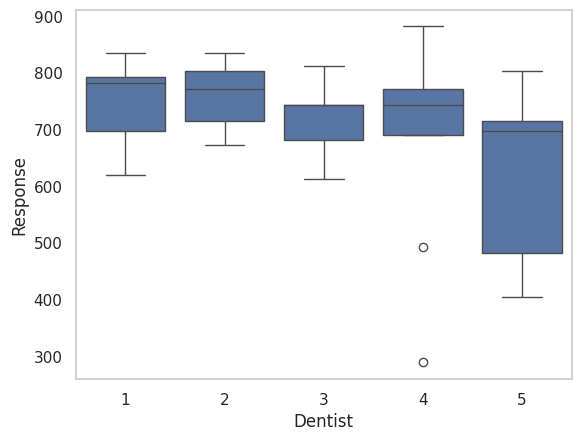

In [33]:
# Lets make a boxplot to get any idea about the hardness of implants depending on dentists
sns.boxplot(df1_alloy1, x = 'Dentist', y = 'Response')
plt.grid(False)
plt.show()

**Observation:**
- For four dentists we could see distribution of response is more or less same.
- But for fifth dentist the distribution of responses is too varied.

**Formulating the Null and Alternate Hypothesis**
- **Null Hypothesis** will be the mean hardness of implants is same for all the dentists.
- **Alternate Hypothesis** will be the mean hardness of implants is different for one of the dentists.

Level of significance = 0.05

**Statistical Test:** One way ANOVA

In a one-way ANOVA test, we compare the means from several populations to test if there is any significance difference between them. The results from an ANOVA test are most reliable when the assumptions of normality and equality of variances are satisfied.

- For testing of normality, Shapiro-Wilk’s test is applied to the response variable.
- For equality of variance, Levene test is applied to the response variable.

**Shapiro-Wilk's Test** (For Normality)

H0: Response follows normal distribution

Ha: Response does not follow normal distribution

In [34]:
from scipy.stats import shapiro
w, p_value = shapiro(df1_alloy1['Response'])
print("P value is:", p_value)

P value is: 1.1945308699072215e-05


**Observation:** We can observe that p value obtained is < 0.05. We reject the null hypothesis. We have statistical evidence to say that the response does not follow normal distribution.

**Levene Test** (For Equality of Variance)

H0: All response variances are equal

Ha: Atleast one response variance is different from the rest

In [35]:
from scipy.stats import levene
statistic, p_value = stats.levene(df1_alloy1[df1_alloy1['Dentist']==1]['Response'],
                            df1_alloy1[df1_alloy1['Dentist']==2]['Response'],
                            df1_alloy1[df1_alloy1['Dentist']==3]['Response'],
                            df1_alloy1[df1_alloy1['Dentist']==4]['Response'],
                            df1_alloy1[df1_alloy1['Dentist']==5]['Response'])
print('The p-value is', p_value)

The p-value is 0.2565537418543795


**Observation:** As p value is > than 0.05. We fail to reject the null hypothesis. We have no statistical evidence to say that atleast one group's response variance is different from the rest.

**Gathering the required data**

In [36]:
response_dentist1 = df1_alloy1[df1_alloy1['Dentist']==1]['Response']
response_dentist2 = df1_alloy1[df1_alloy1['Dentist']==2]['Response']
response_dentist3 = df1_alloy1[df1_alloy1['Dentist']==3]['Response']
response_dentist4 = df1_alloy1[df1_alloy1['Dentist']==4]['Response']
response_dentist5 = df1_alloy1[df1_alloy1['Dentist']==5]['Response']

**Performing One way ANOVA**

In [37]:
from scipy.stats import f_oneway
test_stat, p_value = f_oneway(response_dentist1,response_dentist2,response_dentist3,response_dentist4,response_dentist5)
print("The p value is", p_value)

The p value is 0.11656712140267628


**Observation:** We can observe that obtained p value is > 0.05. So we fail to reject the null hypothesis. We can say that there is not enough statistical evidence to say that mean hardness of implants is differs across the dentists.

**Alloy 2**

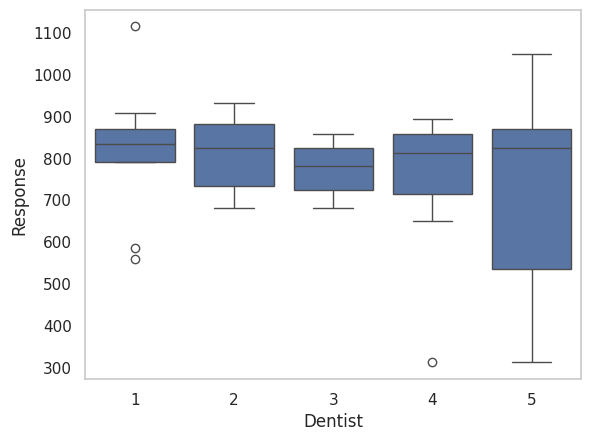

In [38]:
sns.boxplot(df1_alloy2, x = 'Dentist', y = 'Response')
plt.grid(False)
plt.show()

Observation:
- Dentist 5 has varied response for hardness of implants when compared to other dentists.

**Formulating the Null and Alternate Hypothesis**
- **Null Hypothesis** will be the mean hardness of implants is same for all the dentists.
- **Alternate Hypothesis** will be the mean hardness of implants is different for one of the dentists.

Level of significance = 0.05

**Shapiro-Wilk's Test** (For Normality)

H0: Response follows normal distribution

Ha: Response does not follow normal distribution

In [39]:
from scipy.stats import shapiro
w, p_value = shapiro(df1_alloy2['Response'])
print("P value is:", p_value)

P value is: 0.00040293129942514585


**Observation:** We can observe that p value obtained is < 0.05. We reject the null hypothesis. We have statistical evidence to say that the response does not follow normal distribution.

**Levene Test** (For Equality of Variance)

H0: All response variances are equal

Ha: Atleast one response variance is different from the rest

In [40]:
from scipy.stats import levene
statistic, p_value = stats.levene(df1_alloy2[df1_alloy2['Dentist']==1]['Response'],
                            df1_alloy2[df1_alloy2['Dentist']==2]['Response'],
                            df1_alloy2[df1_alloy2['Dentist']==3]['Response'],
                            df1_alloy2[df1_alloy2['Dentist']==4]['Response'],
                            df1_alloy2[df1_alloy2['Dentist']==5]['Response'])
print('The p-value is', p_value)

The p-value is 0.23686777576324952


**Observation:** As p value is > than 0.05. We fail to reject the null hypothesis. We have no statistical evidence to say that atleast one group's response variance is different from the rest.

**Gathering the required data**

In [41]:
response_dentist11 = df1_alloy2[df1_alloy2['Dentist']==1]['Response']
response_dentist21 = df1_alloy2[df1_alloy2['Dentist']==2]['Response']
response_dentist31 = df1_alloy2[df1_alloy2['Dentist']==3]['Response']
response_dentist41 = df1_alloy2[df1_alloy2['Dentist']==4]['Response']
response_dentist51 = df1_alloy2[df1_alloy2['Dentist']==5]['Response']

**Performing One way ANOVA**

In [42]:
from scipy.stats import f_oneway
test_stat, p_value = f_oneway(response_dentist11,response_dentist21,response_dentist31,response_dentist41,response_dentist51)
print("The p value is", p_value)

The p value is 0.7180309510793431


**Observation:** We can onserve that obtained p value is > 0.05. So we fail to reject the null hypothesis. We can say that there is not enough statistical evidence to say that mean hardness of implants is differs across the dentists.

##**4.2 How does the hardness of implants vary depending on methods?**

Here we will perform **One way ANOVA test**

There are three kinds of methods adapted/used by Dentists.

**Alloy1**

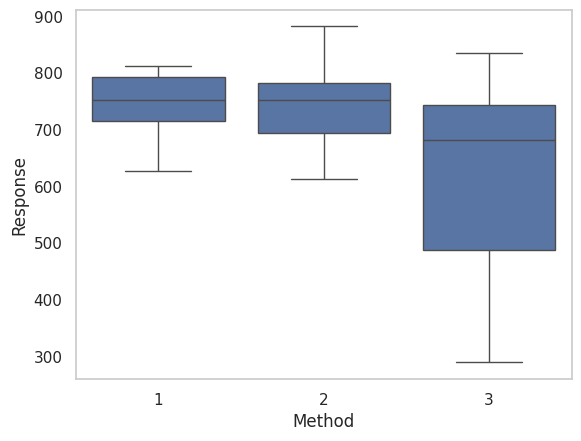

In [43]:
# Lets make a boxplot to get any idea about the hardness of implants depending on methods
sns.boxplot(df1_alloy1, x = 'Method', y = 'Response')
plt.grid(False)
plt.show()

**Observations:**
- From first two methods we could see that distribution of responses is nearly same for hardness of implant.
- Third method yielded varied distribution of responses for hardness of implant.  

**Formulating the Null and Alternate Hypothesis**
- **Null Hypothesis** will be the mean hardness of implants is same for all the methods.
- **Alternate Hypothesis** will be the mean hardness of implants is different for one of the methods.

Before going to do One way ANOVA Test we first check for normality of dependent variable and variance of dependent variable using **Shapiro-Wilk's Test** and **Levene Test** respectively.

**Note:** As the dependent variable is same as the above question we need not perform Shapiro test.

**Levene Test** (For Equality of Variance)

H0: All response variances are equal

Ha: Atleast one response variance is different from the rest

In [44]:
from scipy.stats import levene
statistic, p_value = stats.levene(df1_alloy1[df1_alloy1['Method']==1]['Response'],
                            df1_alloy1[df1_alloy1['Method']==2]['Response'],
                            df1_alloy1[df1_alloy1['Method']==3]['Response'])
print('The p-value is', p_value)

The p-value is 0.0034160381460233975


**Observation:** As p value is < 0.05, we reject the null hypothesis. We have strong statistical evidence to conclude that atleast one group's response variance is different from the rest.

**Gathering the required data**

In [45]:
method_response1 = df1_alloy1[df1_alloy1['Method']==1]['Response']
method_response2 = df1_alloy1[df1_alloy1['Method']==2]['Response']
method_response3 = df1_alloy1[df1_alloy1['Method']==3]['Response']

**Performing One Way ANOVA Test**

In [46]:
test_stat, p_value = f_oneway(method_response1,method_response2,method_response3)
print("The p value is:",p_value)

The p value is: 0.004163412167505543


**Observation:** As p value is < than 0.05. We reject null hypothesis. We have strong statistical evidence to conclude that the mean hardness of implants is different for atleast one of the methods.

**Performing Tukey's HSD test for alloy1.**

In [47]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_alloy1 = pairwise_tukeyhsd(endog = df1_alloy1['Response'],groups = df1_alloy1['Method'],alpha = 0.05)
print("Tukey HSD results for alloy 1:")
print(tukey_alloy1.summary())

Tukey HSD results for alloy 1:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
     1      2   -6.1333  0.987  -102.714  90.4473  False
     1      3    -124.8 0.0085 -221.3807 -28.2193   True
     2      3 -118.6667 0.0128 -215.2473  -22.086   True
--------------------------------------------------------


**Alloy2**

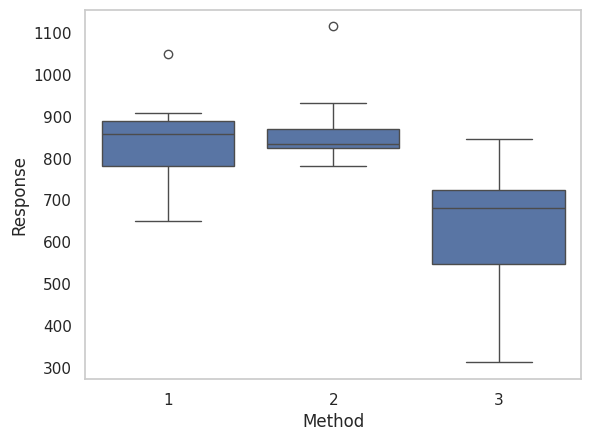

In [48]:
sns.boxplot(df1_alloy2, x = 'Method', y = 'Response')
plt.grid(False)
plt.show()

**Observations:**
- Method 3 has given varied response on hardness of implants when compared to other two methods.

**Formulating the Null and Alternate Hypothesis**
- **Null Hypothesis** will be the mean hardness of implants is same for all the methods.
- **Alternate Hypothesis** will be the mean hardness of implants is different for one of the methods.

**Levene Test** (For Equality of Variance)

H0: All response variances are equal

Ha: Atleast one response variance is different from the rest

In [49]:
from scipy.stats import levene
statistic, p_value = stats.levene(df1_alloy2[df1_alloy2['Method']==1]['Response'],
                            df1_alloy2[df1_alloy2['Method']==2]['Response'],
                            df1_alloy2[df1_alloy2['Method']==3]['Response'])
print('The p-value is', p_value)

The p-value is 0.04469269939158668


**Observation:** As p value is < 0.05, we reject the null hypothesis. We have strong statistical evidence to conclude that atleast one group's response variance is different from the rest.

**Gathering the required data**

In [50]:
method_response11 = df1_alloy2[df1_alloy2['Method']==1]['Response']
method_response21 = df1_alloy2[df1_alloy2['Method']==2]['Response']
method_response31 = df1_alloy2[df1_alloy2['Method']==3]['Response']

**Performing One Way ANOVA Test**

In [51]:
test_stat, p_value = f_oneway(method_response11,method_response21,method_response31)
print("The p value is:",p_value)

The p value is: 5.415871051443187e-06


**Observation:** As p value is < than 0.05. We reject null hypothesis. We have strong statistical evidence to conclude that the mean hardness of implants is different for atleast one of the methods.

**Performing Tukey's HSD test for alloy2.**

In [52]:
tukey_alloy2 = pairwise_tukeyhsd(endog = df1_alloy2['Response'],
                                 groups = df1_alloy2['Method'],
                                 alpha = 0.05)
print("Tukey HSD results for alloy 2:")
print(tukey_alloy2.summary())

Tukey HSD results for alloy 2:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
     1      2     27.0 0.8212  -82.4546  136.4546  False
     1      3   -208.8 0.0001 -318.2546  -99.3454   True
     2      3   -235.8    0.0 -345.2546 -126.3454   True
--------------------------------------------------------


**Observations:** Statistically from Tukey Test for alloy 1 and alloy 2 we can say that method 3 is significantly different from method 1 and method 2.

##**4.3 What is the interaction effect between the dentist and method on the hardness of dental implants for each type of alloy?**

This is a problem, concerning the effect of two independent variables on a dependent variable. **Two-way ANOVA test** is an appropriate test here.

Following are the assumptions of the Two-way ANOVA test:

* The populations from which the samples are obtained must be normally distributed.
* Sampling is done correctly. Observations for within and between groups must be independent.
* The variances among populations must be equal (homoscedastic).
* The dependent data must be measured at an interval scale.


**Interaction Plot to check if there is any interaction for each alloy**

<Figure size 800x600 with 0 Axes>

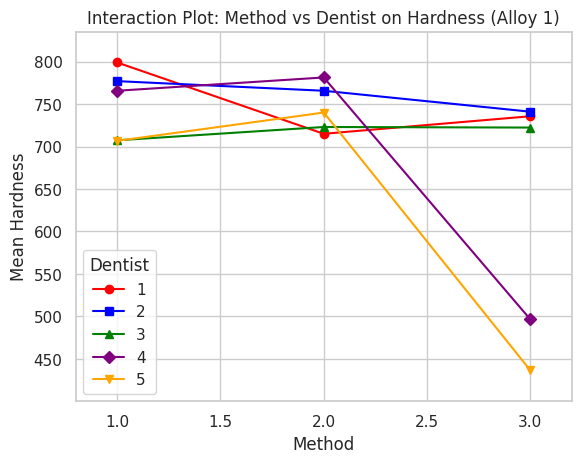

In [53]:
# For Alloy 1
from statsmodels.graphics.factorplots import interaction_plot
plt.figure(figsize=(8,6))
interaction_plot(x=df1_alloy1['Method'],trace=df1_alloy1['Dentist'],response=df1_alloy1['Response'],colors=['red','blue','green','purple','orange'],markers=['o', 's', '^', 'D','v'],ms=6)
plt.title('Interaction Plot: Method vs Dentist on Hardness (Alloy 1)')
plt.ylabel('Mean Hardness')
plt.xlabel('Method')
plt.grid(True)
plt.show()

In [54]:
df1_alloy2.dtypes

,0
Dentist,int64
Method,int64
Alloy,int64
Temp,int64
Response,int64


In [55]:
df1_alloy2.isnull().sum()

,0
Dentist,0
Method,0
Alloy,0
Temp,0
Response,0


In [56]:
df1_alloy2.columns

Index(['Dentist', 'Method', 'Alloy', 'Temp', 'Response'], dtype='object')

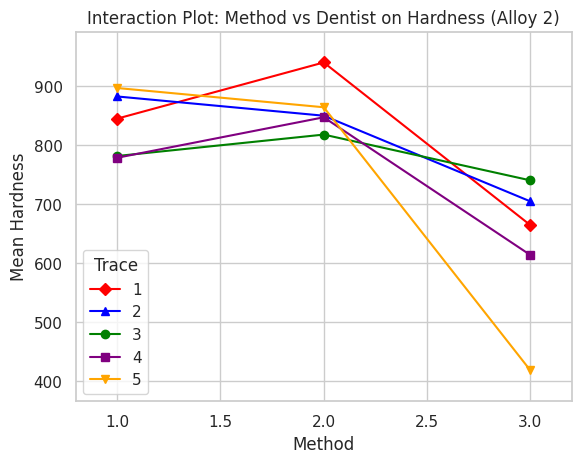

In [57]:
# For Alloy 2
interaction_plot(np.array(df1_alloy2['Method']),np.array(df1_alloy2['Dentist']),np.array(df1_alloy2['Response']),colors=['red','blue','green','purple','orange'],markers=['D','^','o','s','v'], ms=6);
plt.title('Interaction Plot: Method vs Dentist on Hardness (Alloy 2)')
plt.ylabel('Mean Hardness')
plt.xlabel('Method')
plt.grid(True)
plt.show()

##**4.4 How does the hardness of implants vary depending on dentists and methods together?**

**Global Formulation of Null and Alternate hypothesis**

- **Null Hypothesis** is there is no significant effect of Dentists, methods or their interaction on hardness of implants.
- **Alternate Hypothesis** is there is effect of atleast one of the Dentists, methods or their interaction on hardness of implants.

**Formulating Null and Alternate Hypothesis for Dentist**

- **Null Hypothesis** is there is no significant effect of Dentist on hardness of implants.
- **Alternate Hypothesis** is there is significant effect of Dentist on hardness of implants.

**Formulating Null and Alternate Hypothesis for Method**

- **Null Hypothesis** is there is no significant effect of Method on hardness of implants.
- **Alternate Hypothesis** is there is significant effect of Method on hardness of implants.

**Formulating Null and Alternate Hypothesis for interaction between Dentist and Method**

- **Null Hypothesis** is there is no significant interaction between Dentist and Method on hardness of implants.
- **Alternate Hypothesis** is there is significant interaction between Dentist and Method on hardness of implants.

**Two Way ANOVA** test is the statistical test for this problem

**Significance level** as given in the problem is 0.05

**Running Two way ANOVA test for both the alloys separately**

**Alloy1**

**Shapiro-Wilk's Test**

Formulating Null and Alternate Hypothesis
- Null Hypothesis is Residuals are normally distributed
- Alternate Hypothesis is Residuals are not normally distributed

Level of significance 0.05

In [62]:
model_allloy1 = ols('Response ~ C(Dentist) + C(Method) + C(Dentist):C(Method)', data=df1_alloy1).fit()
shapiro_stat_alloy1, shapiro_p_alloy1 = shapiro(model_allloy1.resid)
print(shapiro_p_alloy1)

0.09016859693608688


**Observation:** As p value is > 0.05, we fail to reject the null hypothesis. We don't have enough statistical evidence to say that residuals are not normally distributed.  

**Levene Test**

Formulating Null and Alternate Hypothesis
- Null Hypothesis is All group variances are equal
- Alternate Hypothesis is Atleast one group has a different variance

Level of significance 0.05

In [67]:
df1_alloy1['group'] = df1_alloy1['Dentist'].astype(str) + '_' + df1_alloy1['Method'].astype(str)
grouped_allloy1 = [group['Response'].values for name, group in df1_alloy1.groupby('group')]
levene_stat_alloy1, levene_p_alloy1 = levene(*grouped_allloy1)
print(levene_p_alloy1)

0.3128166652989495


**Observation:** As p value is > 0.05, we fail to reject the null hypothesis. We don't have enough statistical evidence to say that atleast one group has a different variance

In [58]:
model_alloy1 = ols('Response ~ C(Dentist) + C(Method) + C(Dentist):C(Method)', data=df1_alloy1).fit()
anova_table_alloy1 = sm.stats.anova_lm(model_alloy1, typ=2)
print("Anova Table 1:")
print(anova_table_alloy1)

Anova Table 1:
                             sum_sq    df          F    PR(>F)
C(Dentist)            106683.688889   4.0   3.899638  0.011484
C(Method)             148472.177778   2.0  10.854287  0.000284
C(Dentist):C(Method)  185941.377778   8.0   3.398383  0.006793
Residual              205180.000000  30.0        NaN       NaN


**Observations for Alloy 1:**
- If we consider Dentist, as we can observe that p value is less than 0.05 we have statistical evidence to say that different dentists have significant effect on response. (We reject null hypothesis)
- If we consider Method, as we can observe that p value is less than 0.05 we have statistical evidence to say that different methods have significant effect on reponse. (We reject null hypothesis)
- If we consider interaction between Dentist and Method we can observe that p value is less than 0.05 and we have statistical evidence to say that different combination of Dentist and Method have significant effect on response. (We reject null hypothesis)

**Tukey HSD Test**

In [59]:
# Create a combined group column with Dentist and Method for Alloy1 (Tukey Test)
df1_alloy1['group'] = df1_alloy1['Dentist'].astype(str) + '_' + df1_alloy1['Method'].astype(str)
tukey1 = pairwise_tukeyhsd(endog=df1_alloy1['Response'],groups=df1_alloy1['group'],alpha=0.05)
print(tukey1.summary())

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
   1_1    1_2     -84.0 0.9933 -332.8283  164.8283  False
   1_1    1_3  -63.3333 0.9996 -312.1617   185.495  False
   1_1    2_1     -22.0    1.0 -270.8283  226.8283  False
   1_1    2_2  -33.3333    1.0 -282.1617   215.495  False
   1_1    2_3     -58.0 0.9999 -306.8283  190.8283  False
   1_1    3_1  -91.6667 0.9853  -340.495  157.1617  False
   1_1    3_2     -76.0 0.9975 -324.8283  172.8283  False
   1_1    3_3  -76.6667 0.9972  -325.495  172.1617  False
   1_1    4_1  -33.3333    1.0 -282.1617   215.495  False
   1_1    4_2  -17.6667    1.0  -266.495  231.1617  False
   1_1    4_3 -302.6667  0.007  -551.495  -53.8383   True
   1_1    5_1  -92.3333 0.9844 -341.1617   156.495  False
   1_1    5_2     -59.0 0.9998 -307.8283  189.8283  False
   1_1    5_3 -362.6667 0.0007  -611.495 -113.8383   True
   1_2    1_3 

**Observations:**

- In all group comparisons where the result was significant (i.e., p-value < α, and result = True), Dentist 5 using Method 3 consistently appeared, suggesting this specific combination has a notable influence on the hardness of the implant. This supports the hypothesis that the interaction between dentist and method affects implant hardness.

- Another combination worth noting is Dentist 4 using Method 3, which also appeared in a significant group comparison, further emphasizing the potential influence of specific dentist-method pairings on implant performance.

**Alloy2**

**Shapiro-Wilk's Test**

Formulating Null and Alternate Hypothesis
- Null Hypothesis is Residuals are normally distributed
- Alternate Hypothesis is Residuals are not normally distributed

Level of significance 0.05

In [66]:
model_allloy2 = ols('Response ~ C(Dentist) + C(Method) + C(Dentist):C(Method)', data=df1_alloy2).fit()
shapiro_stat_alloy2, shapiro_p_alloy2 = shapiro(model_allloy2.resid)
print(shapiro_p_alloy2)

0.09455155557550783


**Observation:** As p value is > 0.05, we fail to reject the null hypothesis. We don't have enough statistical evidence to say that residuals are not normally distributed.  

**Levene Test**

Formulating Null and Alternate Hypothesis
- Null Hypothesis is All group variances are equal
- Alternate Hypothesis is Atleast one group has a different variance

Level of significance 0.05

In [68]:
df1_alloy2['group'] = df1_alloy2['Dentist'].astype(str) + '_' + df1_alloy2['Method'].astype(str)
grouped_allloy2 = [group['Response'].values for name, group in df1_alloy2.groupby('group')]
levene_stat_alloy2, levene_p_alloy2 = levene(*grouped_allloy2)
print(levene_p_alloy2)

0.7831735515657826


**Observation:** As p value is > 0.05, we fail to reject the null hypothesis. We don't have enough statistical evidence to say that atleast one group has a different variance

In [60]:
model_alloy2 = ols('Response ~ C(Dentist) + C(Method) + C(Dentist):C(Method)', data = df1_alloy2).fit()
anova_table_alloy2 = sm.stats.anova_lm(model_alloy2, typ=2)
print("ANOVA Table 2")
print(anova_table_alloy2)

ANOVA Table 2
                             sum_sq    df          F    PR(>F)
C(Dentist)             56797.911111   4.0   1.106152  0.371833
C(Method)             499640.400000   2.0  19.461218  0.000004
C(Dentist):C(Method)  197459.822222   8.0   1.922787  0.093234
Residual              385104.666667  30.0        NaN       NaN


**Observartions for Alloy 2:**
- If we consider Dentist, as we can observe that p value is greater than 0.05 we don't have enough statistical evidence to say that different dentists have significant effect on response. (We fail to reject null hypothesis)
- If we consider Method, as we can observe that p value is less than 0.05 we have statistical evidence to say that different methods have significant effect on response. (We reject null hypothesis)
- If we consider interaction between Dentist and Method we can observe that p value is greater than 0.05 and we don't have enough statistical evidence to say that different combination of Dentist and Method have significant effect on response. (We fail to reject null hypothesis)

**Tukey HSD Test**

In [61]:
# Create a combined group column with Dentist and Method for Alloy2 (Tukey Test)
df1_alloy2['group'] = df1_alloy2['Dentist'].astype(str) + '_' + df1_alloy2['Method'].astype(str)
tukey2 = pairwise_tukeyhsd(endog=df1_alloy2['Response'],groups=df1_alloy2['group'],alpha=0.05)
print(tukey2.summary())

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
   1_1    1_2   95.3333  0.999 -245.5625  436.2292  False
   1_1    1_3 -180.6667 0.8085 -521.5625  160.2292  False
   1_1    2_1   37.6667    1.0 -303.2292  378.5625  False
   1_1    2_2       5.0    1.0 -335.8958  345.8958  False
   1_1    2_3 -140.3333 0.9635 -481.2292  200.5625  False
   1_1    3_1  -63.3333    1.0 -404.2292  277.5625  False
   1_1    3_2     -27.0    1.0 -367.8958  313.8958  False
   1_1    3_3 -104.6667 0.9973 -445.5625  236.2292  False
   1_1    4_1  -66.3333    1.0 -407.2292  274.5625  False
   1_1    4_2    2.3333    1.0 -338.5625  343.2292  False
   1_1    4_3 -231.3333 0.4686 -572.2292  109.5625  False
   1_1    5_1      52.0    1.0 -288.8958  392.8958  False
   1_1    5_2   19.3333    1.0 -321.5625  360.2292  False
   1_1    5_3    -427.0 0.0049 -767.8958  -86.1042   True
   1_2    1_3 

**Observations:**
- Dentist 5 using Method 3 (group 5_3) consistently appears in all 10 significant comparisons.
- By this we can say that Dentist 5 using Method 3 has a significant impact on hardness of dental implants.